# Assignment 03 
## Problem 01 


Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import optimizers
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt

dataset = pd.read_csv('Human_activity_Dataset.csv')     # shape = (10299, 563)

dataset = dataset.drop(columns=['subject/Participant'])

### Preprocessing

In [2]:
dataset = pd.get_dummies(dataset, columns=['Activity'])
dataset_train, dataset_valid_test = train_test_split(dataset, test_size=0.4)
dataset_valid, dataset_test = train_test_split(dataset_valid_test, test_size=0.5)

labels_train = dataset_train[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                              'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

labels_valid = dataset_valid[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                              'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

labels_test = dataset_test[['Activity_LAYING', 'Activity_SITTING', 'Activity_STANDING', 
                            'Activity_WALKING', 'Activity_WALKING_DOWNSTAIRS', 'Activity_WALKING_UPSTAIRS']]

features_train = dataset_train.drop(columns=labels_train)
features_valid = dataset_valid.drop(columns=labels_valid)
features_test = dataset_test.drop(columns=labels_test)

input_neuron_num = (features_train).shape[1]           # 561:   excluded columns: 'Activity' and 'subject/Participant'    
output_neuron_num = 6                                  # 6:     There are six neurons in the output layer.

## Model Generation

#### 1. Model 01:
 No. Hidden Layers: 4
 #####
 Optimizer: Adam, Learning Rate=0.0001
 #####
 Best Result: 
 ###
 train_loss: 0.0379 - train_accuracy: 0.9876
 ###
 val_loss: 0.0551 - val_accuracy: 0.9806
 ###
 test_loss:0.0561 - test_accuracy: 0.9796

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 561)               0         
                                                                 
 dense (Dense)               (None, 128)               71936     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 90,614
Trainable params: 90,614
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] -

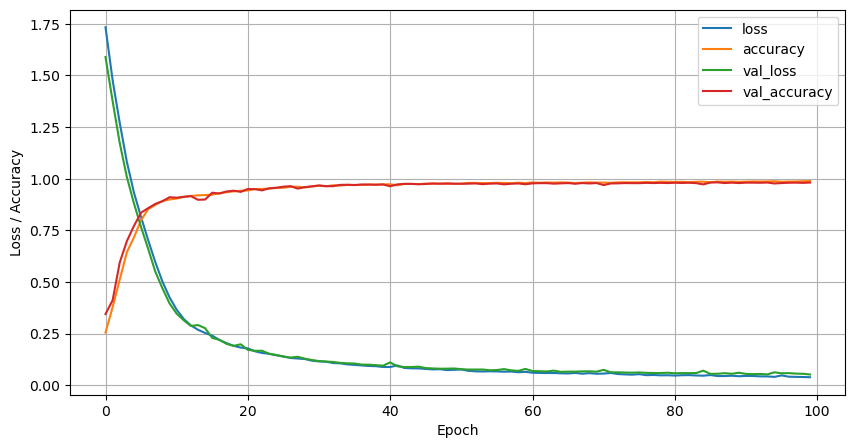

65/65 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9796


[0.056125570088624954, 0.9796116352081299]

In [3]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.Dense(output_neuron_num, activation="softmax")
                            ])

model_1.summary()

optimizer_1 = optimizers.Adam(learning_rate=0.0001)

model_1.compile(
              loss="categorical_crossentropy",
              optimizer=optimizer_1,
              metrics=["accuracy"]
             )

result_hist_1 = model_1.fit(features_train, labels_train, batch_size=256, epochs=100, 
                     validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_1.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_1.evaluate(features_test, labels_test)

#### 2. Model 02:
 No. Hidden Layers: 4
 #####
 Optimizer: Adam, Learning Rate=0.0001
 #####
 Best Result: 
 ###
 train_loss: 0.0321 - train_accuracy: 0.9896
 ###
 val_loss: 0.0459 - val_accuracy: 0.9820
 ###
 test_loss:0.0510 - test_accuracy: 0.9786

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 561)               0         
                                                                 
 dense_104 (Dense)           (None, 128)               71936     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_105 (Dense)           (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_106 (Dense)           (None, 16)              

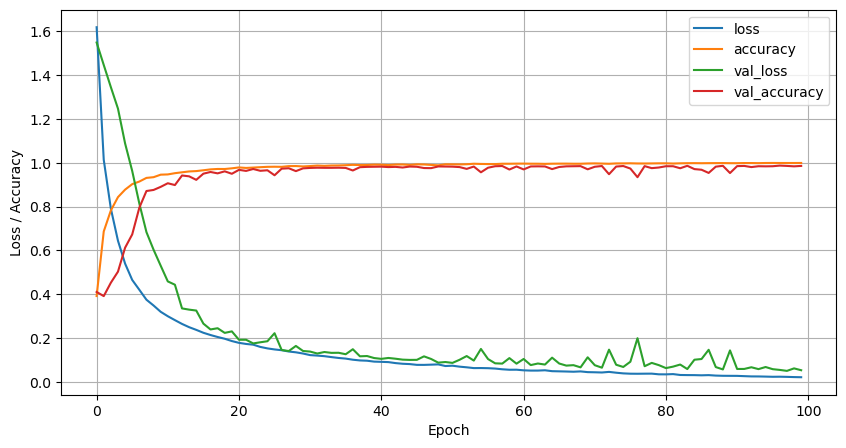

65/65 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9854


[0.051651183515787125, 0.9854369163513184]

In [30]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(output_neuron_num, activation="softmax")
                            ])

model_2.summary()

optimizer_2 = optimizers.Adam(learning_rate=0.0001)

model_2.compile(
              loss="categorical_crossentropy",
              optimizer=optimizer_2,
              metrics=["accuracy"]
             )

result_hist_2 = model_2.fit(features_train, labels_train, batch_size=256, epochs=100, 
                     validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_2.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_2.evaluate(features_test, labels_test)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 561)               0         
                                                                 
 dropout_89 (Dropout)        (None, 561)               0         
                                                                 
 dense_108 (Dense)           (None, 128)               71936     
                                                                 
 dropout_90 (Dropout)        (None, 128)               0         
                                                                 
 dense_109 (Dense)           (None, 64)                8256      
                                                                 
 dropout_91 (Dropout)        (None, 64)                0         
                                                                 
 dense_110 (Dense)           (None, 16)              

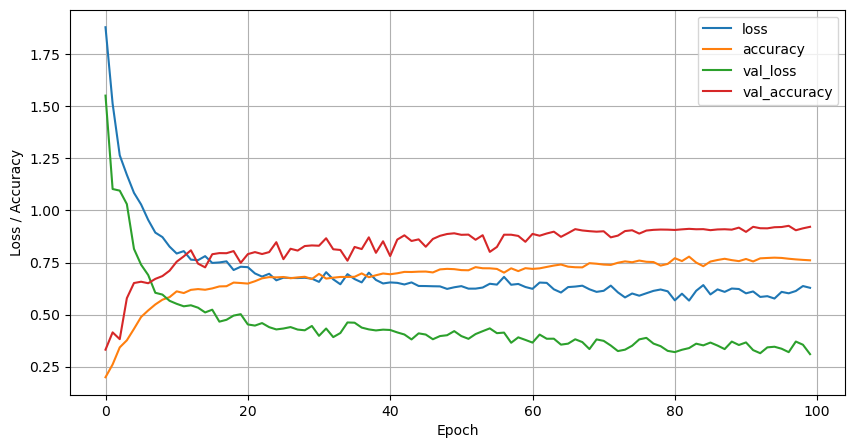

65/65 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.9180


[0.32483381032943726, 0.9179611802101135]

In [31]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(output_neuron_num, activation="softmax")
                            ])

model_3.summary()

optimizer_3 = optimizers.Adam(learning_rate=0.0067)             # best result: lr=0.007

model_3.compile(
              loss="categorical_crossentropy",
              optimizer=optimizer_3,
              metrics=["accuracy"]
             )

result_hist_3 = model_3.fit(features_train, labels_train, batch_size=256, epochs=100, 
                     validation_data=(features_valid, labels_valid))

pd.DataFrame(result_hist_3.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_3.evaluate(features_test, labels_test)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import optimizers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(output_neuron_num, activation="softmax")
])

model_2.summary()

optimizer_2 = optimizers.Adam(learning_rate=0.0001)

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer_2,
    metrics=["accuracy"]
)

result_hist_2 = model_2.fit(
    features_train,
    labels_train,
    batch_size=256,
    epochs=100,
    validation_data=(features_valid, labels_valid)
)

pd.DataFrame(result_hist_2.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_2.evaluate(features_test, labels_test)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import optimizers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[input_neuron_num, 1]),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(output_neuron_num, activation="softmax")
])

model_2.summary()

optimizer_2 = optimizers.Adam(learning_rate=0.0001)

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer_2,
    metrics=["accuracy"]
)

result_hist_2 = model_2.fit(
    features_train,
    labels_train,
    batch_size=256,
    epochs=100,
    validation_data=(features_valid, labels_valid)
)

pd.DataFrame(result_hist_2.history).plot(figsize=(10, 5), grid=True, xlabel="Epoch", ylabel="Loss / Accuracy")
plt.show()

model_2.evaluate(features_test, labels_test)
